In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle


# Загрузка данных

In [2]:
df = pd.read_csv('28.6 vehicles_dataset.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


# Data preparation

## Data cleaning

In [3]:
df.info() #изучем количество пустых строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

In [4]:
df_clean = df.copy()

In [5]:
df_clean[df_clean.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium
3458,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015.0,ford,fusion se,good,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00S0S_3wmNGwLyaE...,"2015 Ford Fusion SE, 2.5 4 cyl. automatic, air...",NaN,ia,41.373000,-93.735800,2021-05-04T11:59:42-0500,low
3547,7313511076,https://athensohio.craigslist.org/ctd/d/athens...,athens,https://athensohio.craigslist.org,23590,2012.0,ford,f150 supercrew cab xlt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00J0J_4mfUGXkpYW...,Carvana is the safer way to buy a car During t...,NaN,oh,39.320000,-82.090000,2021-04-27T16:10:50-0400,high
3635,7314807085,https://oklahomacity.craigslist.org/ctd/d/norm...,oklahoma city,https://oklahomacity.craigslist.org,35988,2018.0,chevrolet,traverse premier,like new,NaN,...,NaN,NaN,https://images.craigslist.org/00i0i_4adOkOM7Vm...,THIS 2018 CHEVROLET TRAVERSE WAS JUST TRADED I...,NaN,ok,35.199000,-97.484100,2021-04-30T10:02:34-0500,high
3726,7311813732,https://youngstown.craigslist.org/ctd/d/struth...,youngstown,https://youngstown.craigslist.org,3000,2006.0,pontiac,grand prix,NaN,NaN,...,NaN,NaN,https://images.craigslist.org/00W0W_aE2NBfU8gr...,2007 PONTIAC GRAND PRIX. GOOD CONDITION IN & O...,NaN,oh,41.023719,-80.594793,2021-04-24T09:42:34-0400,low
3756,7308232496,https://raleigh.craigslist.org/ctd/d/raleigh-2...,raleigh / durham / CH,https://raleigh.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,SUV,NaN,https://images.craigslist.org/00I0I_luAr8SgpD6...,Carvana is the safer way to buy a car During t...,NaN,nc,35.820000,-78.650000,2021-04-17T10:51:25-0400,high


In [6]:
df_clean[df_clean.id == 7312641615]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
616,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.0323,-104.716,2021-04-25T20:15:43-0600,low
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.0323,-104.716,2021-04-25T20:15:43-0600,low


In [7]:
# исключим из датасета дубликаты
df_clean = df_clean.drop_duplicates()
df_clean.shape

(10000, 27)

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    9618 non-null   object 
 7   model           9872 non-null   object 
 8   condition       6234 non-null   object 
 9   cylinders       5920 non-null   object 
 10  fuel            9937 non-null   object 
 11  odometer        9957 non-null   float64
 12  title_status    9834 non-null   object 
 13  transmission    9955 non-null   object 
 14  VIN             6062 non-null   object 
 15  drive           6994 non-null   object 
 16  size            2809 non-null   object 
 17  type            7806 non-null  

<AxesSubplot:>

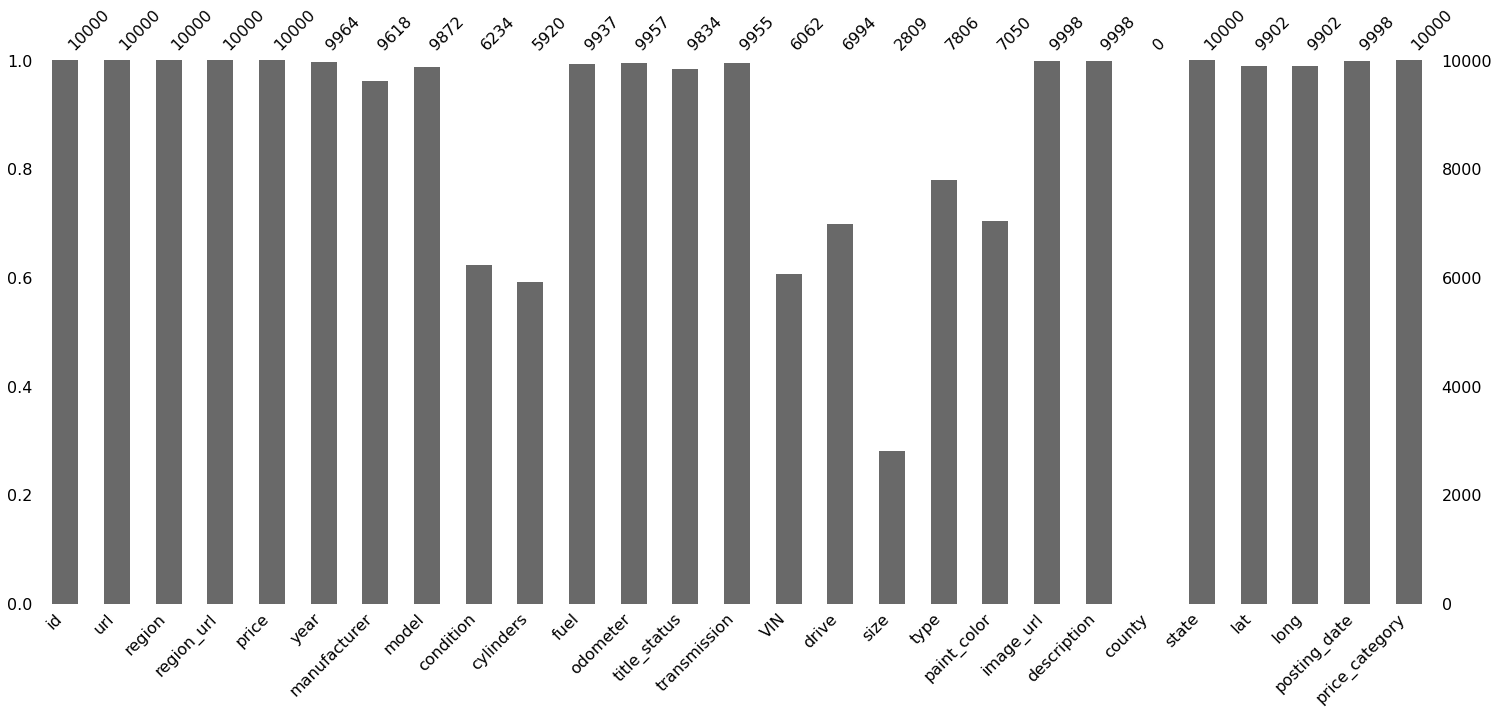

In [9]:
msno.bar(df_clean)

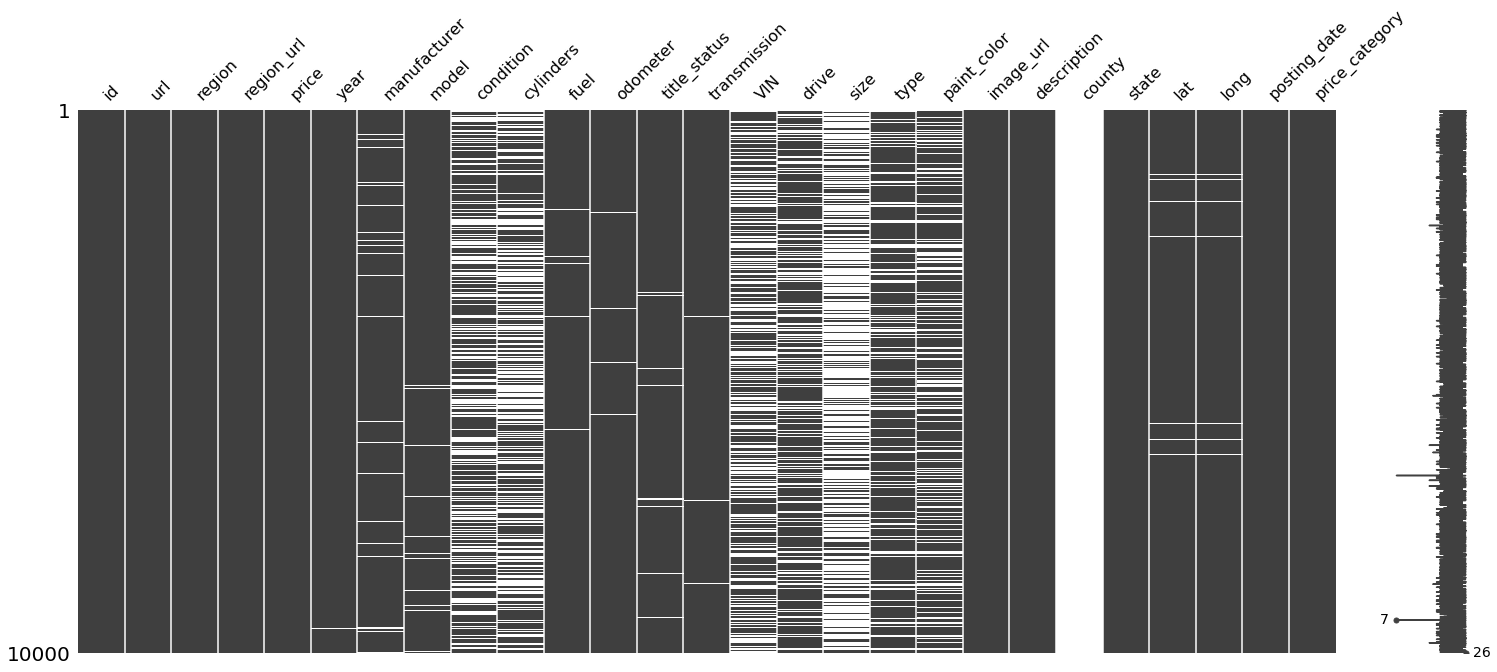

In [10]:
msno.matrix(df_clean);

In [11]:
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values                  

Процент пропущенных значений:


id                 0.000000
state              0.000000
price              0.000000
price_category     0.000000
region             0.000000
url                0.000000
region_url         0.000000
description        0.019900
image_url          0.019900
posting_date       0.019900
year               0.358209
odometer           0.427861
transmission       0.447761
fuel               0.626866
lat                0.975124
long               0.975124
model              1.273632
title_status       1.651741
manufacturer       3.800995
type              21.830846
paint_color       29.353234
drive             29.910448
condition         37.472637
VIN               39.184080
cylinders         40.597015
size              71.552239
county            99.502488
dtype: float64

In [12]:
# уберем колонку 'country', так как она пустая
df_clean = df_clean.drop(columns=['county'], axis=1)

In [13]:
# создадим функцию для проверки заполнености датасета
def print_useful_rows_info(df):
    print("Количество полностью заполненных объектов из всей выборки:", len(df.dropna()))
    print("Процент полностью заполненных объектов из всей выборки:", round((len(df.dropna()))/len(df)*100, 2))

In [14]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 823
Процент полностью заполненных объектов из всей выборки: 8.23


In [15]:
#удалим колонки согласно зданию.
df_clean = df_clean.drop(columns=['type', 'paint_color', 'drive', 'condition', 'VIN', 'cylinders', 'size'], axis=1)

In [16]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9134
Процент полностью заполненных объектов из всей выборки: 91.34


In [17]:
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values   

Процент пропущенных значений:


id                0.000000
state             0.000000
price             0.000000
price_category    0.000000
region            0.000000
url               0.000000
region_url        0.000000
posting_date      0.019900
image_url         0.019900
description       0.019900
year              0.358209
odometer          0.427861
transmission      0.447761
fuel              0.626866
lat               0.975124
long              0.975124
model             1.273632
title_status      1.651741
manufacturer      3.800995
dtype: float64

In [18]:
df_clean[df_clean.description.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium


In [19]:
#удалим строки без описания
df_clean = df_clean.drop(index = [6755, 9430])

In [20]:
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values   

Процент пропущенных значений:


id                0.000000
state             0.000000
description       0.000000
image_url         0.000000
posting_date      0.000000
price_category    0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
year              0.338308
odometer          0.407960
transmission      0.427861
fuel              0.606965
lat               0.955224
long              0.955224
model             1.253731
title_status      1.631841
manufacturer      3.781095
dtype: float64

In [21]:
df_clean[df_clean.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,NaN,500,gas,13508.0,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,NaN,Super Duty F-350 SRW,diesel,1268.0,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,NaN,Grand Caravan,NaN,21.0,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,NaN,olet Silverado 1500,NaN,59246.0,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,NaN,F-150,gas,6110.0,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,NaN,Odyssey,gas,21.0,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,NaN,Grand Caravan,NaN,21.0,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,NaN,CR-V,gas,44128.0,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,NaN,a Sienna,gas,43701.0,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high
1846,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,NaN,Transit Cargo Van,gas,567.0,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high


In [22]:
#проверим наличие даных про год из описания в строках с пропущенными значения года 
df_clean[df_clean.year.isna()].description.apply(lambda x: x.split(' ')[0])

344           2019
420           2020
425           2019
702           2019
893           2020
906           2020
1005          2019
1217          2019
1319          2018
1846          2020
2294          2019
2507          2019
2632     Chevrolet
2822          2019
2962          2018
3299          2018
3515          2020
3527          2020
3679          2019
4231          2020
6140          2018
6216          2020
6344          2020
7230          2018
7683          2021
7846          2019
7850          2019
8562          2020
8841          2019
9372          2019
9592          2020
9768          2019
9896          2019
10002         2020
Name: description, dtype: object

In [23]:
#исключим строку где отсутствует год в описании
df_clean = df_clean.drop(index = [2632])

In [24]:
# Проверили чтобы в остальных данных был только год
df_clean[df_clean.year.isna()].description.apply(lambda x: x.split(' ')[0]).unique()

array(['2019', '2020', '2018', '2021'], dtype=object)

In [25]:
#подставим года в пропущенные строки
df_clean['year'] = df_clean.year.fillna(df_clean[df_clean.year.isna()].description.apply(lambda x: x.split()[0]))

In [26]:
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values   

Процент пропущенных значений:


id                0.000000
state             0.000000
description       0.000000
image_url         0.000000
posting_date      0.000000
price_category    0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
year              0.000000
odometer          0.407960
transmission      0.427861
fuel              0.606965
lat               0.955224
long              0.955224
model             1.253731
title_status      1.631841
manufacturer      3.771144
dtype: float64

In [27]:
# вставим пропущенные данные одометра средние значения
df_clean.odometer = df_clean.odometer.fillna(int(df_clean.odometer.mean()))
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9997 non-null   int64  
 1   url             9997 non-null   object 
 2   region          9997 non-null   object 
 3   region_url      9997 non-null   object 
 4   price           9997 non-null   int64  
 5   year            9997 non-null   object 
 6   manufacturer    9618 non-null   object 
 7   model           9871 non-null   object 
 8   fuel            9936 non-null   object 
 9   odometer        9997 non-null   float64
 10  title_status    9833 non-null   object 
 11  transmission    9954 non-null   object 
 12  image_url       9997 non-null   object 
 13  description     9997 non-null   object 
 14  state           9997 non-null   object 
 15  lat             9901 non-null   float64
 16  long            9901 non-null   float64
 17  posting_date    9997 non-null   

In [28]:
# в пустые ечейки трансмиссии заполним 'other'
df_clean['transmission'] = df_clean.transmission.fillna('other')

In [29]:
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values 

Процент пропущенных значений:


id                0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
posting_date      0.000000
odometer          0.000000
year              0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
price_category    0.000000
fuel              0.606965
lat               0.955224
long              0.955224
model             1.253731
title_status      1.631841
manufacturer      3.771144
dtype: float64

In [30]:
df_clean[df_clean.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242.0,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522.0,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679.0,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,2019,NaN,Grand Caravan,NaN,21.0,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8809,7313576130,https://cnj.craigslist.org/ctd/d/parlin-2012-j...,central NJ,https://cnj.craigslist.org,23500,2012.0,jeep,wrangler unlimited 4wd 4dr sahara,NaN,105927.0,clean,automatic,https://images.craigslist.org/00u0u_erwAahcIeQ...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-27T18:15:18-0400,high
9488,7309365699,https://fortmyers.craigslist.org/chl/ctd/d/bra...,ft myers / SW florida,https://fortmyers.craigslist.org,14997,2010.0,ford,e-350,NaN,153120.0,clean,manual,https://images.craigslist.org/00606_hQvq6K6D4p...,"2010 *Ford* *E-350* 12 Passenger Van - $14,997...",fl,27.479823,-82.571497,2021-04-19T14:01:14-0400,medium
9679,7313475467,https://eugene.craigslist.org/ctd/d/eugene-201...,eugene,https://eugene.craigslist.org,9979,2012.0,chevrolet,equinox awd 4dr lt w/1lt,NaN,165554.0,clean,automatic,https://images.craigslist.org/00q0q_haS6HKqYq4...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-27T12:10:24-0700,medium
9851,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,NaN,95684.0,NaN,other,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low


In [31]:
# пустые ечейки 'fuel' заполним самым популярным значением
df_clean['fuel'] = df_clean.fuel.fillna(df_clean.fuel.describe().top)
df_clean.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442.0,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,gas,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048.0,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291.0,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000.0,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [32]:
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values 

Процент пропущенных значений:


id                0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
posting_date      0.000000
fuel              0.000000
odometer          0.000000
year              0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
price_category    0.000000
lat               0.955224
long              0.955224
model             1.253731
title_status      1.631841
manufacturer      3.771144
dtype: float64

In [33]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9244
Процент полностью заполненных объектов из всей выборки: 92.47


In [34]:
# пропущенные значения 'lat', 'long', заполним медианой
df_clean.lat = df_clean.lat.fillna(df_clean.lat.median())
df_clean.long = df_clean.long.fillna(df_clean.long.median())
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values 

Процент пропущенных значений:


id                0.000000
long              0.000000
lat               0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
posting_date      0.000000
odometer          0.000000
year              0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
fuel              0.000000
price_category    0.000000
model             1.253731
title_status      1.631841
manufacturer      3.771144
dtype: float64

In [35]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9339
Процент полностью заполненных объектов из всей выборки: 93.42


In [36]:
df_clean[df_clean.manufacturer.isna()][['model', 'description']]


,model,description
21,oldsmobile 442,1970 Oldsmobile 442 Convertible 442 Indy Pace ...
66,Diahatsu,1991 Daihatsu hijet 5 speed extended cab....im...
182,Scion iM Hatchback 4D,Carvana is the safer way to buy a car During t...
201,Voltswagon Beetle,"New Brakes, new serpentine belt, new catalytic..."
217,THOMAS SCHOOL BUS,5.9 CUMMINS DIESEL; 28 Passenger with 2 Rear A...
...,...,...
9908,Scion xD Hatchback 4D,Carvana is the safer way to buy a car During t...
9959,FREIGHTLINER M2 106,"2013 *FREIGHTLINER* *M2 106* M2106 - $24,900Ca..."
9985,Suzuki Grand Vitara,"2012 Suzuki Grand Vitara Premium 4WD - $7,450 ..."
10002,F-150,2020 *Ford* *F-150* 180 MILES. LIFTED FORD F15...


In [37]:
# пропущенные значение производителя заполним значением 'other'
df_clean.manufacturer = df_clean.manufacturer.fillna('other')
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values 

Процент пропущенных значений:


id                0.000000
long              0.000000
lat               0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
posting_date      0.000000
odometer          0.000000
manufacturer      0.000000
year              0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
fuel              0.000000
price_category    0.000000
model             1.253731
title_status      1.631841
dtype: float64

In [38]:
# пропущеные значения признака 'title_status', заполним самым популярным
df_clean.title_status = df_clean.title_status.fillna(df_clean.title_status.describe().top)
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values 

Процент пропущенных значений:


id                0.000000
long              0.000000
lat               0.000000
state             0.000000
description       0.000000
image_url         0.000000
transmission      0.000000
title_status      0.000000
posting_date      0.000000
odometer          0.000000
manufacturer      0.000000
year              0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
fuel              0.000000
price_category    0.000000
model             1.253731
dtype: float64

In [39]:
# В пустые 'model', подставим 'other'
df_clean.model = df_clean.model.fillna('other')
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values 

Процент пропущенных значений:


id                0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
title_status      0.0
posting_date      0.0
odometer          0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
url               0.0
fuel              0.0
price_category    0.0
dtype: float64

In [40]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9997
Процент полностью заполненных объектов из всей выборки: 100.0


## Приведение типов

In [41]:
df_type = df_clean.copy()

In [42]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9997 non-null   int64  
 1   url             9997 non-null   object 
 2   region          9997 non-null   object 
 3   region_url      9997 non-null   object 
 4   price           9997 non-null   int64  
 5   year            9997 non-null   object 
 6   manufacturer    9997 non-null   object 
 7   model           9997 non-null   object 
 8   fuel            9997 non-null   object 
 9   odometer        9997 non-null   float64
 10  title_status    9997 non-null   object 
 11  transmission    9997 non-null   object 
 12  image_url       9997 non-null   object 
 13  description     9997 non-null   object 
 14  state           9997 non-null   object 
 15  lat             9997 non-null   float64
 16  long            9997 non-null   float64
 17  posting_date    9997 non-null   

In [43]:
# приведем признаки 'year' к целому типу
df_type.year = df_type.year.astype(int)

In [44]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9997 non-null   int64  
 1   url             9997 non-null   object 
 2   region          9997 non-null   object 
 3   region_url      9997 non-null   object 
 4   price           9997 non-null   int64  
 5   year            9997 non-null   int32  
 6   manufacturer    9997 non-null   object 
 7   model           9997 non-null   object 
 8   fuel            9997 non-null   object 
 9   odometer        9997 non-null   float64
 10  title_status    9997 non-null   object 
 11  transmission    9997 non-null   object 
 12  image_url       9997 non-null   object 
 13  description     9997 non-null   object 
 14  state           9997 non-null   object 
 15  lat             9997 non-null   float64
 16  long            9997 non-null   float64
 17  posting_date    9997 non-null   

In [45]:
# приведем дату к типу 'posting_date'
pd.to_datetime(df_type.posting_date, utc=True)

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-05-03 22:32:06+00:00
                   ...           
10045   2021-04-10 20:33:57+00:00
10046   2021-05-03 13:36:30+00:00
10047   2021-04-22 19:14:01+00:00
10048   2021-04-14 14:14:42+00:00
10049   2021-04-24 17:50:49+00:00
Name: posting_date, Length: 9997, dtype: datetime64[ns, UTC]

In [46]:
df_type['date'] = pd.to_datetime(df_type.posting_date, utc=True)

In [47]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 10049
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9997 non-null   int64              
 1   url             9997 non-null   object             
 2   region          9997 non-null   object             
 3   region_url      9997 non-null   object             
 4   price           9997 non-null   int64              
 5   year            9997 non-null   int32              
 6   manufacturer    9997 non-null   object             
 7   model           9997 non-null   object             
 8   fuel            9997 non-null   object             
 9   odometer        9997 non-null   float64            
 10  title_status    9997 non-null   object             
 11  transmission    9997 non-null   object             
 12  image_url       9997 non-null   object             
 13  description     9997 non-null   

In [48]:
# одометр к целому
df_type.odometer = df_type.odometer.astype(int)

In [49]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 10049
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9997 non-null   int64              
 1   url             9997 non-null   object             
 2   region          9997 non-null   object             
 3   region_url      9997 non-null   object             
 4   price           9997 non-null   int64              
 5   year            9997 non-null   int32              
 6   manufacturer    9997 non-null   object             
 7   model           9997 non-null   object             
 8   fuel            9997 non-null   object             
 9   odometer        9997 non-null   int32              
 10  title_status    9997 non-null   object             
 11  transmission    9997 non-null   object             
 12  image_url       9997 non-null   object             
 13  description     9997 non-null   

## Аномалии и выбросы

In [50]:
df_type.odometer.describe().apply(lambda x: f'{x:0.3f}')

count       9997.000
mean       95684.289
std        86480.335
min            0.000
25%        39149.000
50%        89000.000
75%       136875.000
max      3245000.000
Name: odometer, dtype: object

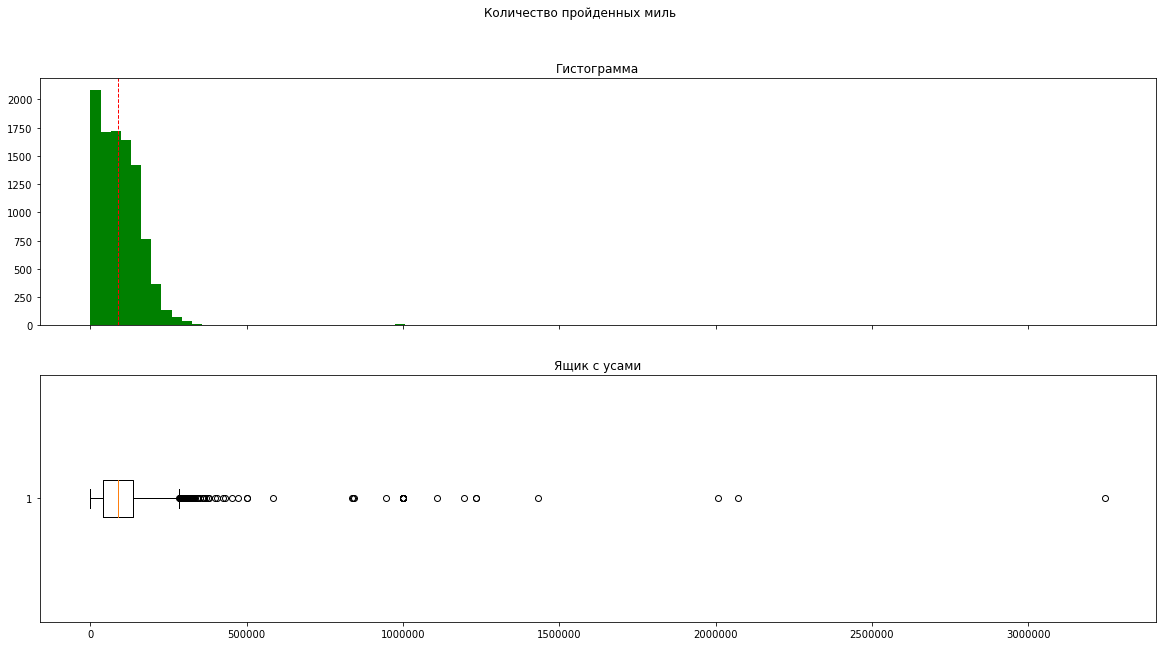

In [51]:
# нарисуем график выбросов
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)

ax1.hist(df_type.odometer, bins=100, color='green')
ax1.set_title('Гистограмма')
ax1.axvline(df_type.odometer.median(), color='red', linestyle='dashed', linewidth=1)

ax2.boxplot(df_type.odometer, vert=False)
ax2.set_title('Ящик с усами')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.suptitle('Количество пройденных миль');

In [52]:
def calculate_otliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5*iqr, q75 + 1.5*iqr)
    
    return boundaries

In [53]:
boundaries = calculate_otliers(df_type.odometer)

In [54]:
is_outlier = (df_type.odometer < calculate_otliers(df_type.odometer)[0]) | (df_type.odometer > calculate_otliers(df_type.odometer)[1])
is_outlier.sum()

91

In [55]:
df_type[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003,dodge,3500,diesel,307000,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LV...,2003 Dodge 3500 4x4 diesel dually. It has 307k...,tx,31.270000,-94.646900,2021-04-23T14:27:25-0500,medium,2021-04-23 19:27:25+00:00
114,7310943842,https://showlow.craigslist.org/ctd/d/pinetop-2...,show low,https://showlow.craigslist.org,2795,2004,mazda,tribute,gas,999999,clean,automatic,https://images.craigslist.org/00y0y_9hjvC3qkk3...,ACCUSHINE AUTO SALES 1827 E. WHITE MTN. BLVD. ...,az,34.117500,-109.919700,2021-04-22T10:52:07-0700,low,2021-04-22 17:52:07+00:00
385,7306101528,https://desmoines.craigslist.org/ctd/d/windom-...,des moines,https://desmoines.craigslist.org,59950,2013,other,CATERPILLAR CT660S,diesel,345256,clean,automatic,https://images.craigslist.org/00I0I_UkoGuDPqYZ...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2013 CATERP...,ia,43.863689,-95.113792,2021-04-13T08:34:24-0500,high,2021-04-13 13:34:24+00:00
444,7304168190,https://elpaso.craigslist.org/ctd/d/las-cruces...,el paso,https://elpaso.craigslist.org,16999,2016,jeep,renegade,gas,999999,clean,automatic,https://images.craigslist.org/00Q0Q_ajHii9qB6e...,"‘16 Jeep Renegade Limited, auto, air, power wi...",tx,32.288990,-106.781616,2021-04-09T09:26:05-0600,medium,2021-04-09 15:26:05+00:00
552,7314722320,https://nh.craigslist.org/ctd/d/medford-2015-h...,new hampshire,https://nh.craigslist.org,26500,2015,other,HINO 268A,diesel,429194,clean,automatic,https://images.craigslist.org/01111_aEpkHS4iop...,"2015 HINO 268A 24' REFRIG NCDL 260 HP, ALLISIO...",nh,42.417300,-71.108700,2021-04-30T07:30:45-0400,high,2021-04-30 11:30:45+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,7314148003,https://kansascity.craigslist.org/cto/d/lees-s...,"kansas city, MO",https://kansascity.craigslist.org,2999,2010,chevrolet,hhr ls,gas,344000,clean,automatic,https://images.craigslist.org/00n0n_h4YYCjZeD9...,2010 CHEVY HHR LS --- POWER LOCKS/WINDOWS/MIRR...,ks,38.851800,-94.394400,2021-04-28T20:15:49-0500,low,2021-04-29 01:15:49+00:00
9317,7313696556,https://mcallen.craigslist.org/cto/d/mcallen-2...,mcallen / edinburg,https://mcallen.craigslist.org,4500,2003,chevrolet,avalanche,gas,298968,clean,automatic,https://images.craigslist.org/00m0m_ey8pcui9d1...,Vendo mi Chevrolet Avalanche 2003 que está en ...,tx,26.215400,-98.235900,2021-04-27T23:10:38-0500,low,2021-04-28 04:10:38+00:00
9431,7306697432,https://knoxville.craigslist.org/cto/d/knoxvil...,knoxville,https://knoxville.craigslist.org,3550,2012,nissan,nv2500,gas,370000,clean,automatic,https://images.craigslist.org/00404_guoJBc6u6o...,Good running and driving van,tn,35.991800,-83.849600,2021-04-14T11:54:41-0400,low,2021-04-14 15:54:41+00:00
9542,7311709925,https://greatfalls.craigslist.org/cto/d/havre-...,great falls,https://greatfalls.craigslist.org,7000,2005,chevrolet,silverado,gas,290000,clean,automatic,https://images.craigslist.org/00808_hX52l6571o...,"2005 Chevy 1500 LS, has 290k miles on it but h...",mt,48.542862,-109.695310,2021-04-23T20:41:47-0600,low,2021-04-24 02:41:47+00:00


In [56]:
# избавим датасет от анамалий и выбросов
df_type.loc[is_outlier, 'odometer'] = int(boundaries[1])
df_type.odometer.describe()

count      9997.000000
mean      93333.021807
std       63183.698268
min           0.000000
25%       39149.000000
50%       89000.000000
75%      136875.000000
max      283464.000000
Name: odometer, dtype: float64

In [57]:
df_type.year.describe()

count    9997.000000
mean     2010.955487
std         9.668015
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

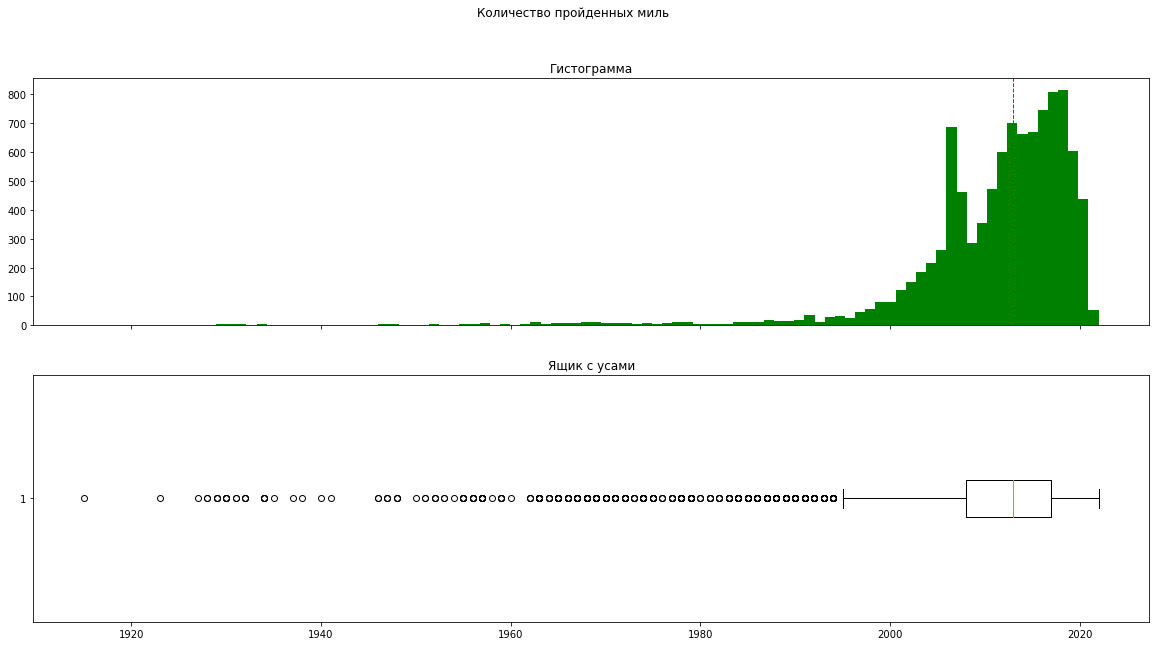

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)

ax1.hist(df_type.year, bins=100, color='green')
ax1.set_title('Гистограмма')
ax1.axvline(df_type.year.median(), color='red', linestyle='dashed', linewidth=1)

ax2.boxplot(df_type.year, vert=False)
ax2.set_title('Ящик с усами')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.suptitle('Количество пройденных миль');

In [59]:
def calculate_outliers_3sigma(data):
    low = data.mean() - 3*data.std()
    high = data.mean() + 3*data.std()
    boundaries = (low, high)
    
    return boundaries

In [60]:
bound = calculate_otliers(df_type.year)

In [61]:
is_outlier = (df_type.year<bound[0]) | (df_type.year>bound[1])
df_type[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04T20:22:11-0700,medium,2021-05-05 03:22:11+00:00
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29T15:11:01-0600,high,2021-04-29 21:11:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27T14:30:28-0500,low,2021-04-27 19:30:28+00:00
9969,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23T13:51:20-0700,medium,2021-04-23 20:51:20+00:00
9993,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27T19:44:27-0700,high,2021-04-28 02:44:27+00:00
10021,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03T14:58:34-0700,medium,2021-05-03 21:58:34+00:00


In [62]:
df_type.loc[is_outlier, 'year'] = int(bound[0])

In [63]:
df_type.year.describe()

count    9997.000000
mean     2011.694508
std         6.520959
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [64]:
df_type.price.describe().apply(lambda x: f'{x:0.3f}')

count        9997.000
mean        20682.785
std        124641.443
min           500.000
25%          7900.000
50%         15763.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [65]:
bound_price = calculate_otliers(df_type.price)
out_price = (df_type.price < bound_price[0]) | (df_type.price > bound_price[1])

In [66]:
df_type.loc[out_price, 'price_category'].unique()

array(['high'], dtype=object)

In [67]:
df_type.loc[out_price, 'price'] = int(bound_price[1])

In [68]:
df_type.price.describe()

count     9997.000000
mean     18971.871962
std      13695.895428
min        500.000000
25%       7900.000000
50%      15763.000000
75%      27990.000000
max      58125.000000
Name: price, dtype: float64

In [69]:
# преобразую данные по региону
df_type.region_url.apply(lambda x: x.lower().split('//')[1].split('.')[0])

0         chattanooga
1           newjersey
2                reno
3        fayetteville
4             newyork
             ...     
10045      chautauqua
10046      binghamton
10047           salem
10048         madison
10049         norfolk
Name: region_url, Length: 9997, dtype: object

In [70]:
df_type["region_new"] = df_type.region_url.apply(lambda x: x.lower().split('//')[1].split('.')[0])

In [71]:
df_type.state.unique()

array(['tn', 'nj', 'ca', 'nc', 'ny', 'ia', 'va', 'mi', 'ri', 'oh', 'fl',
       'wa', 'hi', 'ks', 'mt', 'sc', 'wi', 'az', 'ct', 'tx', 'nv', 'or',
       'pa', 'ak', 'me', 'mo', 'nm', 'co', 'id', 'mn', 'la', 'vt', 'ky',
       'il', 'sd', 'in', 'md', 'al', 'ok', 'ma', 'de', 'ar', 'ne', 'ga',
       'nh', 'nd', 'ut', 'wv', 'dc', 'wy', 'ms'], dtype=object)

## Feature engineering

In [72]:
df_engin = df_type.copy()

In [73]:
df_engin.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'region_new'],
      dtype='object')

In [74]:
df_engin.apply(lambda x: x.date.year, axis=1).unique()

array([2021], dtype=int64)

In [75]:
# создадим новый признак 'age' и внесем его в датасет
df_engin['age'] = 2021 - df_engin.year
df_engin['age']

0         1
1         5
2         4
3         8
4         0
         ..
10045    19
10046    13
10047    10
10048     6
10049     4
Name: age, Length: 9997, dtype: int32

In [76]:
# создадим признак 'desc_len', внесем в датасет
df_engin['desc_len'] = df_engin.apply(lambda x: len(x.description), axis=1)
df_engin['desc_len']

0        4482
1         968
2        4286
3        3241
4         538
         ... 
10045    1710
10046     948
10047     909
10048    3644
10049    4483
Name: desc_len, Length: 9997, dtype: int64

In [77]:
df_engin.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'region_new', 'age', 'desc_len'],
      dtype='object')

In [78]:
df_engin['manufacturer_model'] = df_engin.apply(lambda x: ': '.join([x.manufacturer, x.model]), axis=1)

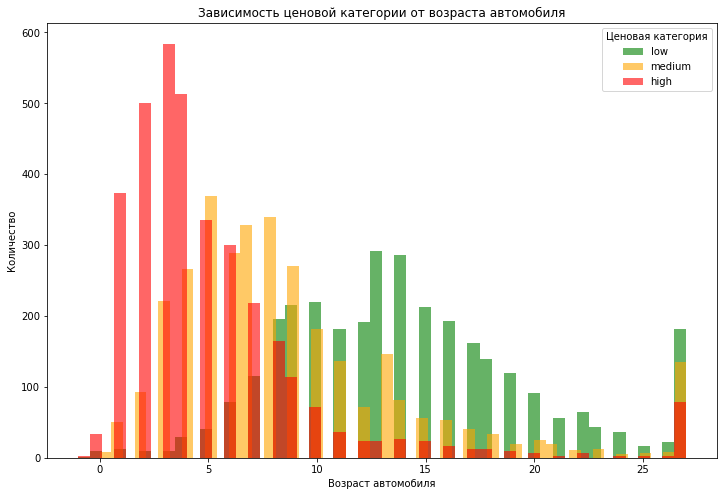

In [79]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_engin[df_engin['price_category'] == price_category]
   
    ax.hist(data['age'], color=color, bins=50, alpha=0.6)

plt.xlabel('Возраст автомобиля')
plt.ylabel('Количество')
plt.title('Зависимость ценовой категории от возраста автомобиля')
plt.legend(colors, title='Ценовая категория');

In [80]:
df_engin.manufacturer_model

0            ram: 2500 crew cab big horn
1             ford: explorer 4wd 4dr xlt
2           volkswagen: golf r hatchback
3                           toyota: rav4
4                         nissan: altima
                      ...               
10045                       toyota: rav4
10046                     jeep: wrangler
10047    audi: a3 2.0t premium plus pzev
10048                   porsche: cayenne
10049        ram: 1500 crew cab big horn
Name: manufacturer_model, Length: 9997, dtype: object

In [81]:
df_engin['model_in_desc'] = df_engin.apply(lambda x: x.description.count(x.model), axis=1)

In [82]:
df_engin.model_in_desc.value_counts()

0     8802
1      824
2      104
3       57
5       34
4       25
16      16
9       14
7       11
14      11
8       10
28       9
15       9
6        9
17       8
18       7
20       5
27       3
23       3
19       3
11       3
13       3
31       3
25       3
22       3
29       2
35       2
26       2
10       2
36       1
12       1
34       1
30       1
54       1
49       1
56       1
32       1
39       1
63       1
Name: model_in_desc, dtype: int64

In [83]:
#создадим еще признаки 'short_model', 'model_len', 'manufacturer_model_len'
df_engin['short_model'] = df_engin.apply(lambda x: x.model.split()[0], axis=1)
df_engin.short_model

0            2500
1        explorer
2            golf
3            rav4
4          altima
           ...   
10045        rav4
10046    wrangler
10047          a3
10048     cayenne
10049        1500
Name: short_model, Length: 9997, dtype: object

In [84]:
df_engin['model_len'] = df_engin.apply(lambda x: len(x.model), axis=1)

In [85]:
df_engin['manufacturer_model_len'] = df_engin.apply(lambda x: len(x.manufacturer_model), axis=1)

## Преобразование данных

### Категориальные переменные

In [86]:
df_new = df_engin.copy()

In [87]:
df_new.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'region_new', 'age', 'desc_len',
       'manufacturer_model', 'model_in_desc', 'short_model', 'model_len',
       'manufacturer_model_len'],
      dtype='object')

In [88]:
# Удалим не нужные и преобразованые признаки
df_new = df_new.drop(columns=['id', 'price', 'url', 'region','region_url', 'model', 'description', 'image_url', 'posting_date', 'manufacturer_model', 'region_new'], axis=1)

In [89]:
df_new.columns

Index(['year', 'manufacturer', 'fuel', 'odometer', 'title_status',
       'transmission', 'state', 'lat', 'long', 'price_category', 'date', 'age',
       'desc_len', 'model_in_desc', 'short_model', 'model_len',
       'manufacturer_model_len'],
      dtype='object')

In [90]:
# Выделим категориальные признаки, внесем их в отдельный датасет
print(df_new[['manufacturer', 'fuel', 'title_status', 'transmission', 'state', 'short_model']].apply(lambda x: x.unique()))
print(df_new[['manufacturer', 'fuel', 'title_status', 'transmission', 'state', 'short_model']].nunique())

manufacturer    [ram, ford, volkswagen, toyota, nissan, bmw, h...
fuel                       [diesel, gas, other, electric, hybrid]
title_status    [clean, rebuilt, salvage, lien, missing, parts...
transmission                           [other, automatic, manual]
state           [tn, nj, ca, nc, ny, ia, va, mi, ri, oh, fl, w...
short_model     [2500, explorer, golf, rav4, altima, 1, fusion...
dtype: object
manufacturer     40
fuel              5
title_status      6
transmission      3
state            51
short_model     989
dtype: int64


In [91]:
data = df_new[['manufacturer', 'fuel', 'title_status', 'transmission', 'short_model', 'state']]
data

,manufacturer,fuel,title_status,transmission,short_model,state
0,ram,diesel,clean,other,2500,tn
1,ford,gas,clean,automatic,explorer,nj
2,volkswagen,gas,clean,other,golf,ca
3,toyota,gas,clean,automatic,rav4,nc
4,nissan,gas,clean,automatic,altima,ny
...,...,...,...,...,...,...
10045,toyota,gas,clean,automatic,rav4,ny
10046,jeep,gas,clean,other,wrangler,ny
10047,audi,gas,clean,automatic,a3,or
10048,porsche,hybrid,clean,automatic,cayenne,wi


In [92]:
# Преобразуем категорияальные признаки
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

In [93]:
ohe.fit(data)

OneHotEncoder(sparse=False)

In [94]:
ohe_data = ohe.transform(data)
ohe_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
ohe.get_feature_names()

array(['x0_acura', 'x0_alfa-romeo', 'x0_audi', ..., 'x5_wi', 'x5_wv',
       'x5_wy'], dtype=object)

In [96]:
df_new[ohe.get_feature_names()] = ohe_data

In [97]:
df_new.columns

Index(['year', 'manufacturer', 'fuel', 'odometer', 'title_status',
       'transmission', 'state', 'lat', 'long', 'price_category',
       ...
       'x5_sd', 'x5_tn', 'x5_tx', 'x5_ut', 'x5_va', 'x5_vt', 'x5_wa', 'x5_wi',
       'x5_wv', 'x5_wy'],
      dtype='object', length=1111)

In [98]:
# удалим не преобразованные признаки
df_new = df_new.drop(data, axis=1)

In [99]:
df_new.head()

,year,odometer,lat,long,price_category,date,age,desc_len,model_in_desc,model_len,...,x5_sd,x5_tn,x5_tx,x5_ut,x5_va,x5_vt,x5_wa,x5_wi,x5_wv,x5_wy
0,2020,27442,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00,1,4482,0,22,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,60023,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00,5,968,0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,14048,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00,4,4286,0,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,117291,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00,8,3241,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,8000,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00,0,538,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Числовые данные

In [100]:
data_std = df_new[['lat', 'long', 'year', 'odometer', 'age', 'desc_len', 'model_in_desc', 'model_len', 'manufacturer_model_len']]
data_std

,lat,long,year,odometer,age,desc_len,model_in_desc,model_len,manufacturer_model_len
0,35.060000,-85.250000,2020,27442,1,4482,0,22,27
1,40.821805,-74.061962,2016,60023,5,968,0,20,26
2,33.779214,-84.411811,2017,14048,4,4286,0,16,28
3,35.715954,-78.655304,2013,117291,8,3241,0,4,12
4,40.654800,-73.609700,2021,8000,0,538,0,6,14
...,...,...,...,...,...,...,...,...,...
10045,42.123900,-79.189500,2002,150000,19,1710,0,4,12
10046,43.216990,-77.755610,2008,113573,13,948,0,8,14
10047,44.925908,-122.982753,2011,150184,10,909,0,25,31
10048,43.029559,-89.397796,2015,61943,6,3644,0,7,16


In [101]:
# приобразуем числовые данные
new_name = []
for columns in data_std.columns:
    new_name.append(columns + '_std')

In [102]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [103]:
std_scaler.fit(data_std)

StandardScaler()

In [104]:
std_scaled = std_scaler.transform(data_std)
std_scaled

array([[-0.60878815,  0.49055137,  1.2737247 , ..., -0.16420734,
         1.15951637,  0.81916832],
       [ 0.38171937,  1.11039473,  0.66028735, ..., -0.16420734,
         0.92909515,  0.70689333],
       [-0.8289671 ,  0.53698899,  0.81364668, ..., -0.16420734,
         0.46825271,  0.93144331],
       ...,
       [ 1.08725261, -1.59993099, -0.10650934, ..., -0.16420734,
         1.50514821,  1.26826829],
       [ 0.76125269,  0.26075382,  0.50692801, ..., -0.16420734,
        -0.56864279, -0.4158566 ],
       [-0.33201428,  0.98640221,  0.81364668, ..., -0.16420734,
         1.15951637,  0.81916832]])

In [105]:
df_new[new_name] = std_scaled
df_new.head()

,year,odometer,lat,long,price_category,date,age,desc_len,model_in_desc,model_len,...,x5_wy,lat_std,long_std,year_std,odometer_std,age_std,desc_len_std,model_in_desc_std,model_len_std,manufacturer_model_len_std
0,2020,27442,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00,1,4482,0,22,...,0.0,-0.608788,0.490551,1.273725,-1.042901,-1.273725,0.606561,-0.164207,1.159516,0.819168
1,2016,60023,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00,5,968,0,20,...,0.0,0.381719,1.110395,0.660287,-0.527220,-0.660287,-0.659290,-0.164207,0.929095,0.706893
2,2017,14048,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00,4,4286,0,16,...,0.0,-0.828967,0.536989,0.813647,-1.254896,-0.813647,0.535956,-0.164207,0.468253,0.931443
3,2013,117291,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00,8,3241,0,4,...,0.0,-0.496024,0.855913,0.200209,0.379199,-0.200209,0.159515,-0.164207,-0.914275,-0.864957
4,2021,8000,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00,0,538,0,6,...,0.0,0.353010,1.135451,1.427084,-1.350622,-1.427084,-0.814189,-0.164207,-0.683853,-0.640407


In [106]:
df_new.head()

,year,odometer,lat,long,price_category,date,age,desc_len,model_in_desc,model_len,...,x5_wy,lat_std,long_std,year_std,odometer_std,age_std,desc_len_std,model_in_desc_std,model_len_std,manufacturer_model_len_std
0,2020,27442,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00,1,4482,0,22,...,0.0,-0.608788,0.490551,1.273725,-1.042901,-1.273725,0.606561,-0.164207,1.159516,0.819168
1,2016,60023,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00,5,968,0,20,...,0.0,0.381719,1.110395,0.660287,-0.527220,-0.660287,-0.659290,-0.164207,0.929095,0.706893
2,2017,14048,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00,4,4286,0,16,...,0.0,-0.828967,0.536989,0.813647,-1.254896,-0.813647,0.535956,-0.164207,0.468253,0.931443
3,2013,117291,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00,8,3241,0,4,...,0.0,-0.496024,0.855913,0.200209,0.379199,-0.200209,0.159515,-0.164207,-0.914275,-0.864957
4,2021,8000,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00,0,538,0,6,...,0.0,0.353010,1.135451,1.427084,-1.350622,-1.427084,-0.814189,-0.164207,-0.683853,-0.640407


In [107]:
data_mm = df_new[['lat', 'long']]

In [108]:
X_scaler = MinMaxScaler()
X_scaler.fit(data_mm)
X_scaled = X_scaler.transform(data_mm)
new_name_mm = []
for columns in data_mm.columns:
    new_name_mm.append(columns + '_mm')
df_new[new_name_mm] = X_scaled
df_new

,year,odometer,lat,long,price_category,date,age,desc_len,model_in_desc,model_len,...,long_std,year_std,odometer_std,age_std,desc_len_std,model_in_desc_std,model_len_std,manufacturer_model_len_std,lat_mm,long_mm
0,2020,27442,35.060000,-85.250000,high,2021-04-17 16:30:50+00:00,1,4482,0,22,...,0.490551,1.273725,-1.042901,-1.273725,0.606561,-0.164207,1.159516,0.819168,0.773737,0.219365
1,2016,60023,40.821805,-74.061962,medium,2021-05-03 19:40:21+00:00,5,968,0,20,...,1.110395,0.660287,-0.527220,-0.660287,-0.659290,-0.164207,0.929095,0.706893,0.817357,0.253069
2,2017,14048,33.779214,-84.411811,high,2021-04-28 10:52:20+00:00,4,4286,0,16,...,0.536989,0.813647,-1.254896,-0.813647,0.535956,-0.164207,0.468253,0.931443,0.764041,0.221890
3,2013,117291,35.715954,-78.655304,medium,2021-04-17 14:08:57+00:00,8,3241,0,4,...,0.855913,0.200209,0.379199,-0.200209,0.159515,-0.164207,-0.914275,-0.864957,0.778703,0.239231
4,2021,8000,40.654800,-73.609700,medium,2021-05-03 22:32:06+00:00,0,538,0,6,...,1.135451,1.427084,-1.350622,-1.427084,-0.814189,-0.164207,-0.683853,-0.640407,0.816092,0.254431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,2002,150000,42.123900,-79.189500,low,2021-04-10 20:33:57+00:00,19,1710,0,4,...,0.826317,-1.486743,0.896906,1.486743,-0.391999,-0.164207,-0.914275,-0.864957,0.827214,0.237622
10046,2008,113573,43.216990,-77.755610,medium,2021-05-03 13:36:30+00:00,13,948,0,8,...,0.905758,-0.566587,0.320351,0.566587,-0.666495,-0.164207,-0.453432,-0.640407,0.835489,0.241942
10047,2011,150184,44.925908,-122.982753,low,2021-04-22 19:14:01+00:00,10,909,0,25,...,-1.599931,-0.106509,0.899818,0.106509,-0.680544,-0.164207,1.505148,1.268268,0.848427,0.105697
10048,2015,61943,43.029559,-89.397796,high,2021-04-14 14:14:42+00:00,6,3644,0,7,...,0.260754,0.506928,-0.496831,-0.506928,0.304688,-0.164207,-0.568643,-0.415857,0.834070,0.206870


In [109]:
# удалим не преобразованные данные
df_new = df_new.drop(data_std, axis=1)

In [110]:
df_new.head()

,price_category,date,x0_acura,x0_alfa-romeo,x0_audi,x0_bmw,x0_buick,x0_cadillac,x0_chevrolet,x0_chrysler,...,long_std,year_std,odometer_std,age_std,desc_len_std,model_in_desc_std,model_len_std,manufacturer_model_len_std,lat_mm,long_mm
0,high,2021-04-17 16:30:50+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490551,1.273725,-1.042901,-1.273725,0.606561,-0.164207,1.159516,0.819168,0.773737,0.219365
1,medium,2021-05-03 19:40:21+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.110395,0.660287,-0.527220,-0.660287,-0.659290,-0.164207,0.929095,0.706893,0.817357,0.253069
2,high,2021-04-28 10:52:20+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.536989,0.813647,-1.254896,-0.813647,0.535956,-0.164207,0.468253,0.931443,0.764041,0.221890
3,medium,2021-04-17 14:08:57+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.855913,0.200209,0.379199,-0.200209,0.159515,-0.164207,-0.914275,-0.864957,0.778703,0.239231
4,medium,2021-05-03 22:32:06+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.135451,1.427084,-1.350622,-1.427084,-0.814189,-0.164207,-0.683853,-0.640407,0.816092,0.254431


In [111]:
df_new.columns

Index(['price_category', 'date', 'x0_acura', 'x0_alfa-romeo', 'x0_audi',
       'x0_bmw', 'x0_buick', 'x0_cadillac', 'x0_chevrolet', 'x0_chrysler',
       ...
       'long_std', 'year_std', 'odometer_std', 'age_std', 'desc_len_std',
       'model_in_desc_std', 'model_len_std', 'manufacturer_model_len_std',
       'lat_mm', 'long_mm'],
      dtype='object', length=1107)

In [112]:
df_new['month'] = df_new.date.apply(lambda x: x.month)
df_new['dayofweek'] = df_new.date.dt.dayofweek

In [113]:
data_date = df_new[['month', 'dayofweek']]
std_scaler_date = StandardScaler()
std_scaler_date.fit(data_date)
std_scaled_date = std_scaler_date.transform(data_date)

new_name_date = []
for columns in data_date.columns:
    new_name_date.append(columns + '_std')

df_new[new_name_date] = std_scaled_date
df_new.head()

,price_category,date,x0_acura,x0_alfa-romeo,x0_audi,x0_bmw,x0_buick,x0_cadillac,x0_chevrolet,x0_chrysler,...,desc_len_std,model_in_desc_std,model_len_std,manufacturer_model_len_std,lat_mm,long_mm,month,dayofweek,month_std,dayofweek_std
0,high,2021-04-17 16:30:50+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.606561,-0.164207,1.159516,0.819168,0.773737,0.219365,4,5,-0.612611,1.115254
1,medium,2021-05-03 19:40:21+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.659290,-0.164207,0.929095,0.706893,0.817357,0.253069,5,0,1.632357,-1.373850
2,high,2021-04-28 10:52:20+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.535956,-0.164207,0.468253,0.931443,0.764041,0.221890,4,2,-0.612611,-0.378208
3,medium,2021-04-17 14:08:57+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159515,-0.164207,-0.914275,-0.864957,0.778703,0.239231,4,5,-0.612611,1.115254
4,medium,2021-05-03 22:32:06+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.814189,-0.164207,-0.683853,-0.640407,0.816092,0.254431,5,0,1.632357,-1.373850


In [114]:
df_new = df_new.drop(columns=['date'], axis=1)
df_new

,price_category,x0_acura,x0_alfa-romeo,x0_audi,x0_bmw,x0_buick,x0_cadillac,x0_chevrolet,x0_chrysler,x0_datsun,...,desc_len_std,model_in_desc_std,model_len_std,manufacturer_model_len_std,lat_mm,long_mm,month,dayofweek,month_std,dayofweek_std
0,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.606561,-0.164207,1.159516,0.819168,0.773737,0.219365,4,5,-0.612611,1.115254
1,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.659290,-0.164207,0.929095,0.706893,0.817357,0.253069,5,0,1.632357,-1.373850
2,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.535956,-0.164207,0.468253,0.931443,0.764041,0.221890,4,2,-0.612611,-0.378208
3,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159515,-0.164207,-0.914275,-0.864957,0.778703,0.239231,4,5,-0.612611,1.115254
4,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.814189,-0.164207,-0.683853,-0.640407,0.816092,0.254431,5,0,1.632357,-1.373850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.391999,-0.164207,-0.914275,-0.864957,0.827214,0.237622,4,5,-0.612611,1.115254
10046,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.666495,-0.164207,-0.453432,-0.640407,0.835489,0.241942,5,0,1.632357,-1.373850
10047,low,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.680544,-0.164207,1.505148,1.268268,0.848427,0.105697,4,3,-0.612611,0.119612
10048,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.304688,-0.164207,-0.568643,-0.415857,0.834070,0.206870,4,2,-0.612611,-0.378208


In [115]:
df_new.columns

Index(['price_category', 'x0_acura', 'x0_alfa-romeo', 'x0_audi', 'x0_bmw',
       'x0_buick', 'x0_cadillac', 'x0_chevrolet', 'x0_chrysler', 'x0_datsun',
       ...
       'desc_len_std', 'model_in_desc_std', 'model_len_std',
       'manufacturer_model_len_std', 'lat_mm', 'long_mm', 'month', 'dayofweek',
       'month_std', 'dayofweek_std'],
      dtype='object', length=1110)

# Modeling

In [116]:
df_prepared = df_new.copy()

In [117]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [118]:
rf_clf = RandomForestClassifier(random_state=42)

In [119]:
rf_clf.fit(x_train, y_train)
list(rf_clf.feature_importances_)

[0.0011403288551295257,
 7.401105022245638e-05,
 0.0015403445119909938,
 0.0024126842371613314,
 0.0014825676406764405,
 0.0016265898087970464,
 0.005951014294861736,
 0.0020338869707234256,
 6.268509986473486e-05,
 0.0023432386504395834,
 0.00011895398662245341,
 0.0006734787796073389,
 0.0066042165129598296,
 0.0035932629886292838,
 6.538897677436296e-05,
 0.0037650205246090407,
 0.004049341127614371,
 0.0010419391260177038,
 0.0005029614457444601,
 0.0034530221070396216,
 0.0038246366832652887,
 0.0018827788322027103,
 0.0008399712731182651,
 0.0015121128220108061,
 0.002479553713485194,
 0.00048707543010539326,
 0.000915986296770342,
 0.0014266157864765382,
 0.0036588064268669035,
 0.003936279410028293,
 0.000872911308500682,
 0.0006257308686329417,
 0.005229939807975305,
 0.0008438922221446025,
 0.00032943129352289006,
 0.001806560298514923,
 0.00040330437623204655,
 0.004305291280070959,
 0.0036656812414251534,
 0.0008333103101796724,
 0.010245963244150256,
 0.0004661217158660113

In [120]:
# удалим признаки чья значимость равна 0
f_dict = dict(zip(x_train.columns, rf_clf.feature_importances_))
df_prep = df_prepared.drop([k for k in f_dict.keys() if f_dict[k]==0], axis=1)

In [121]:
df_prep.shape

(9997, 958)

In [154]:
x = df_prep.drop(['price_category'], axis=1)
y = df_prep['price_category']

rf_clf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression(solver='newton-cg', random_state=42)

In [156]:
for model in [rf_clf, log_reg]:
    cv_score = cross_val_score(model, x, y, cv=5)
    print(cv_score.mean(), cv_score.std())
              

0.7647288144072035 0.003089467483747115
0.7840356178089045 0.009414895196256497


# Result

In [157]:
# Логистическая регрессия показала лучше результат по сравнению со случаным лесом 0.765 против 0.784, отклонения меньше 1%, модели не переобучены.

In [158]:
log_reg.fit(x, y)

LogisticRegression(random_state=42, solver='newton-cg')

In [159]:
filename = 'model_avto.pickle'

with open(filename, 'wb') as file:
    pickle.dump(log_reg, file)